<a href="https://colab.research.google.com/github/sheffysabu22/sheffysabu22/blob/main/Adv_Analytics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1**.**Loading the** **Dataset**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Youth_Tobacco_Survey__YTS__Data.csv')

**2. Selecting Relevant Columns for Clustering**

In [2]:
clustering_data = df[['Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size']]

**3. Handling Missing Values**

In [3]:
clustering_data = clustering_data.dropna()

**4. Encoding Categorical Variables**

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Race'] = label_encoder.fit_transform(df['Race'])
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Education'] = label_encoder.fit_transform(df['Education'])

**5. Standardizing Numerical Features**

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

**6. Elbow Method to Determine Optimal Number of Clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

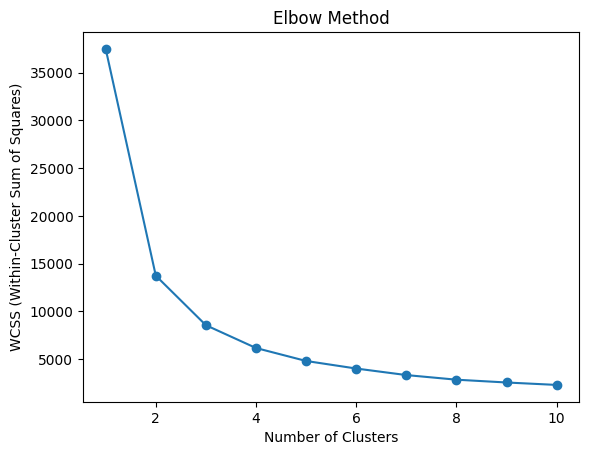

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(clustering_data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

In [8]:
# check data dimensions
print(df.shape)
print(clustering_data_scaled.shape)

(9794, 31)
(9369, 4)


In [10]:
import pandas as pd
clustering_data_scaled = pd.DataFrame(clustering_data_scaled)
clustering_data_scaled.head()

,0,1,2,3
0,-0.834219,-0.907466,-0.769921,-0.056560
1,-0.834219,-0.907466,-0.765768,-0.355980
2,-0.838914,-0.918139,-0.769921,-0.368806
3,-0.397574,-0.539269,-0.279847,-0.076904
4,-0.378793,-0.512589,-0.271540,-0.369690


**7. K-Means Clustering**

In [12]:
from sklearn.cluster import KMeans

In [16]:
print(f"Number of rows in clustering_data_scaled: {clustering_data_scaled.shape[0]}")
print(f"Number of rows in df: {df.shape[0]}")

Number of rows in clustering_data_scaled: 9369
Number of rows in df: 9794


In [17]:
df = df.iloc[:clustering_data_scaled.shape[0], :]

In [18]:
clustering_data_scaled = clustering_data_scaled.iloc[:df.shape[0], :]

In [19]:
df['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-19-b014269e40b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(clustering_data_scaled)


**8. Silhouette Score Calculation**

In [21]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(clustering_data_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6878096422225459


**9. Visualizing Clusters**

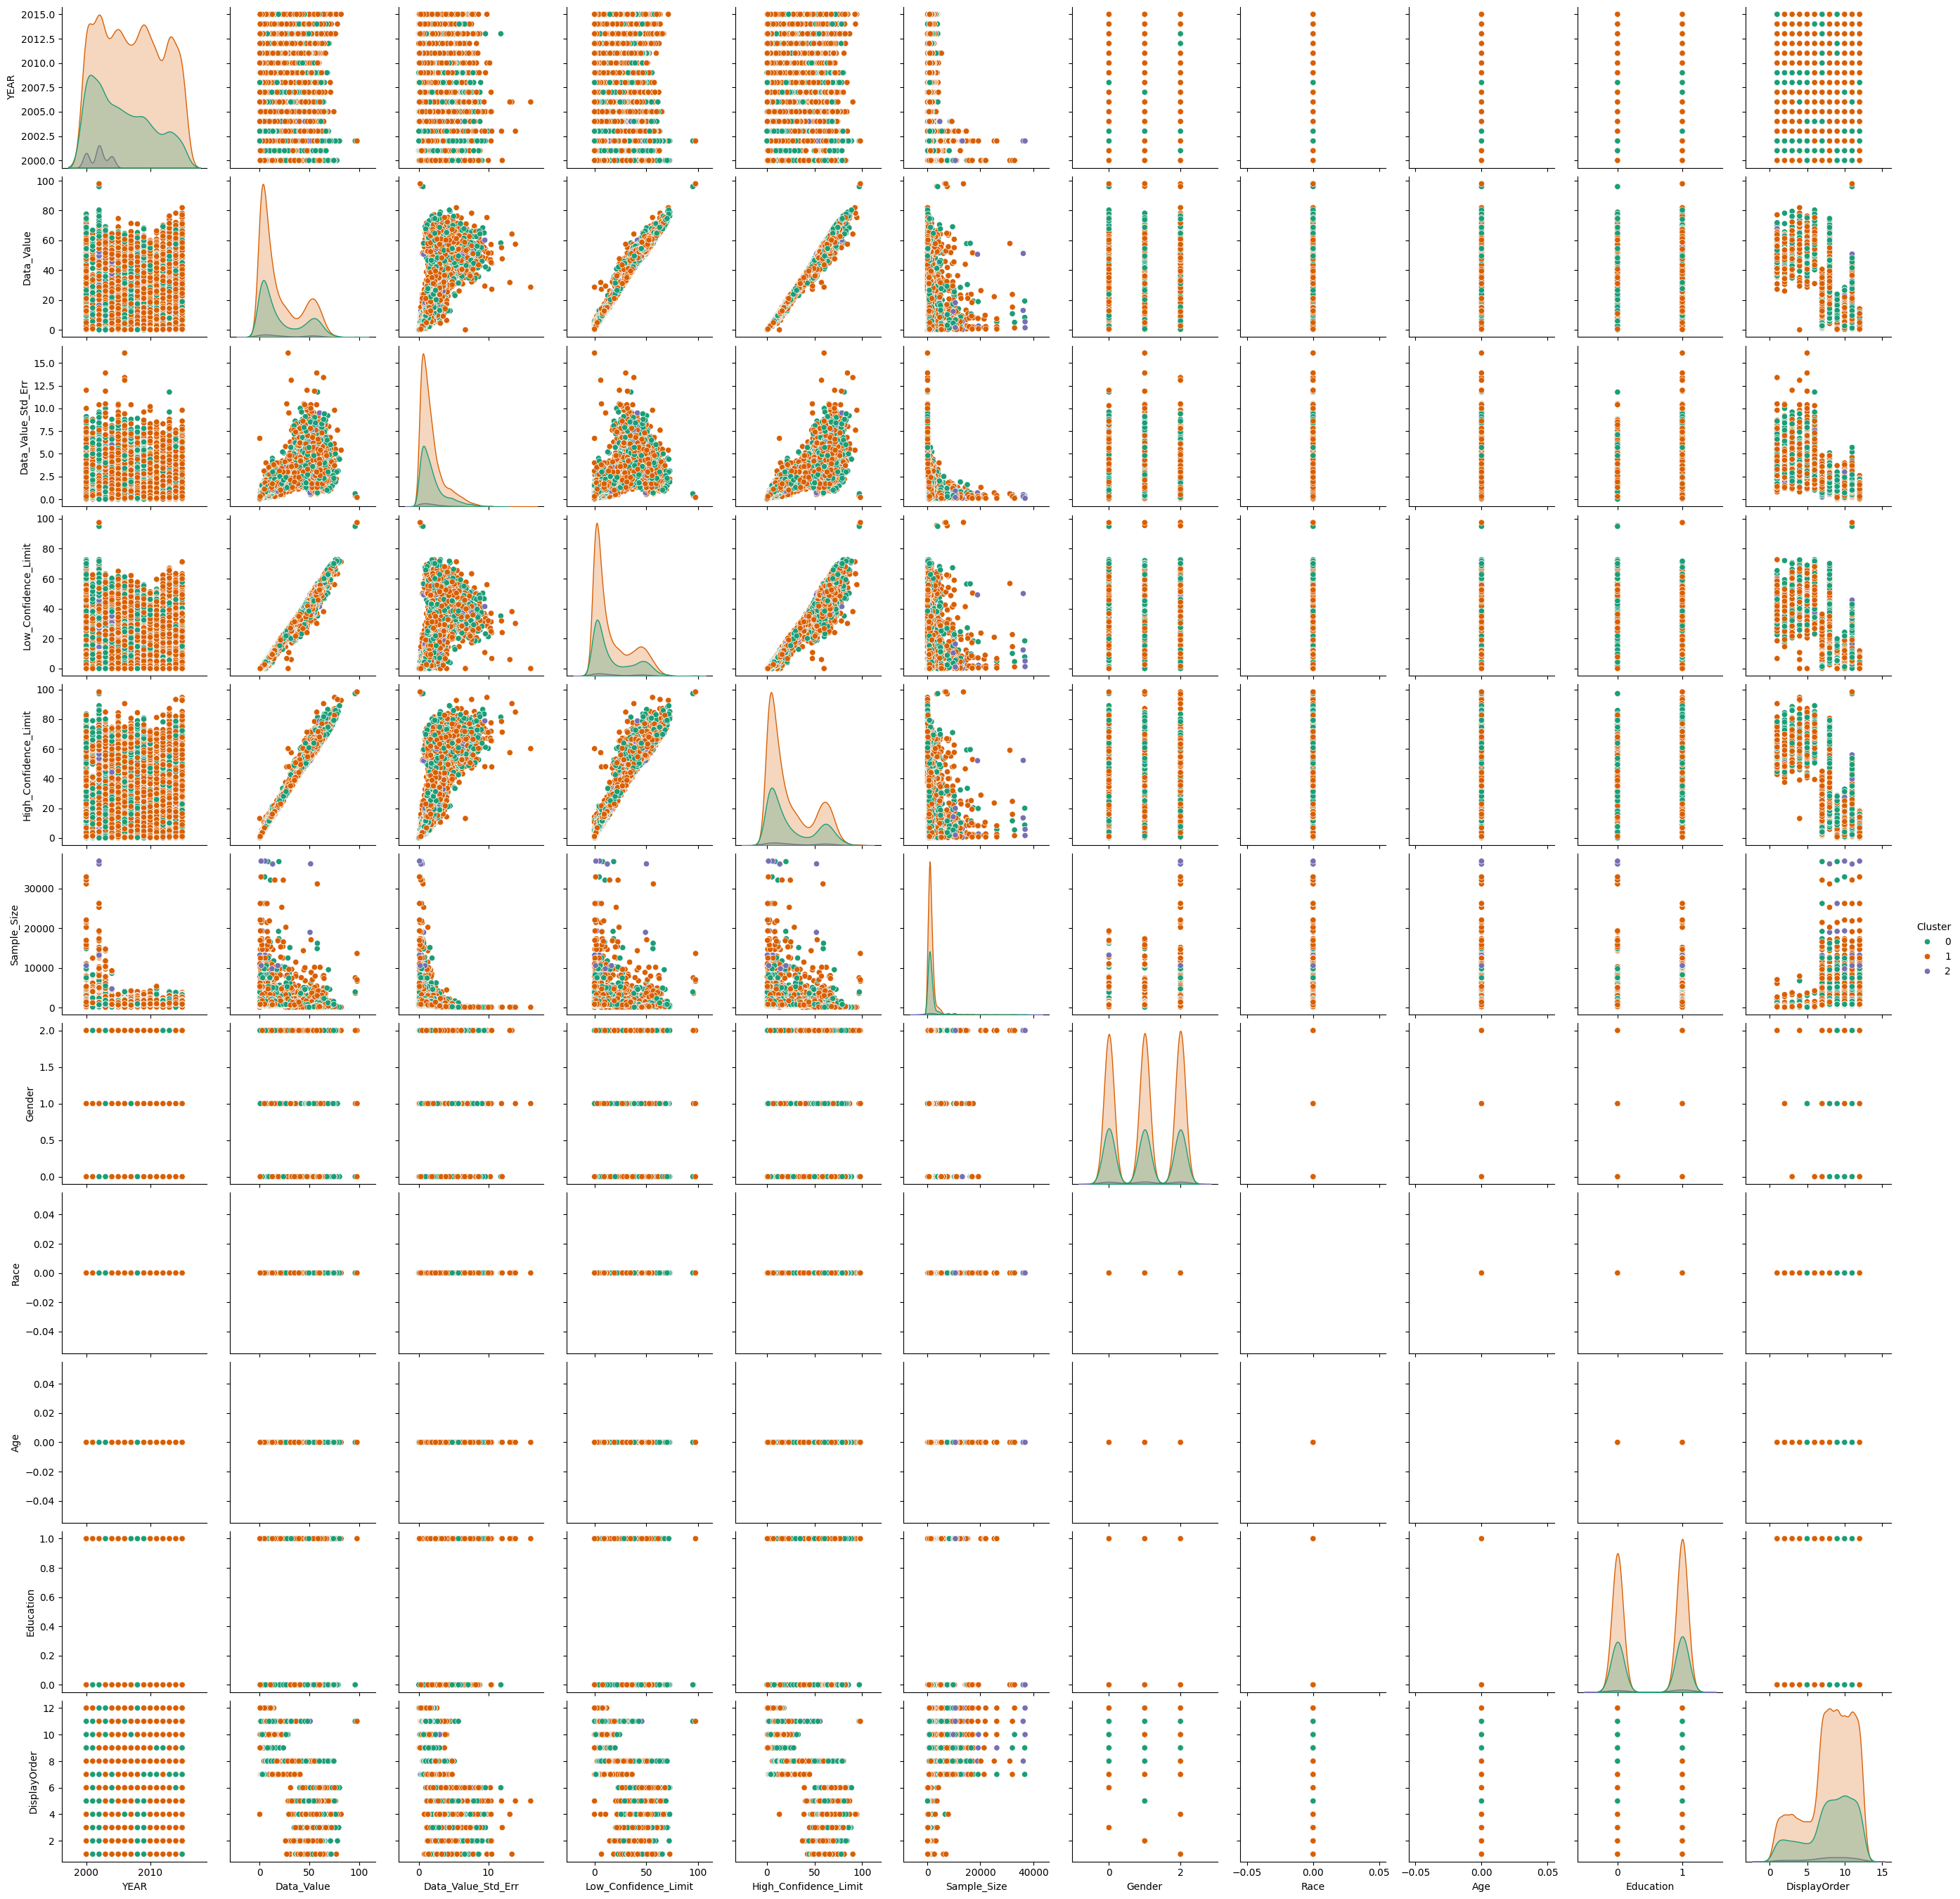

In [22]:
import seaborn as sns

sns.pairplot(df, hue='Cluster', palette='Dark2', diag_kind='kde')
plt.show()

**10. Displaying Cluster Distribution Table**

In [23]:
cluster_counts = df['Cluster'].value_counts().sort_index().reset_index()
cluster_counts.columns = ['Cluster', 'Count']
print("\nCluster Distribution:")
print(cluster_counts)


Cluster Distribution:
   Cluster  Count
0        0   2760
1        1   6418
2        2    191
